-----------------------------------------------------------------------------------------------------------------------------------------------------------
###### A detailed of replication of PyTorch Tutorials ([Link](https://pytorch.org/tutorials/beginner/basics/intro.html))
-----------------------------------------------------------------------------------------------------------------------------------------------------------

In [30]:
import torch
import numpy as np

#### Tensors

In [31]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [32]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [33]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones}")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]])


In [34]:
tensor = torch.rand(3,4)
tensor

tensor([[0.9252, 0.5451, 0.2625, 0.2895],
        [0.8915, 0.3243, 0.5120, 0.8665],
        [0.3421, 0.1649, 0.1999, 0.9698]])

In [35]:
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


#### Datasets & DataLoaders

In [36]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12750846.85it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 228607.99it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:06<00:00, 674497.53it/s] 


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 512503.31it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



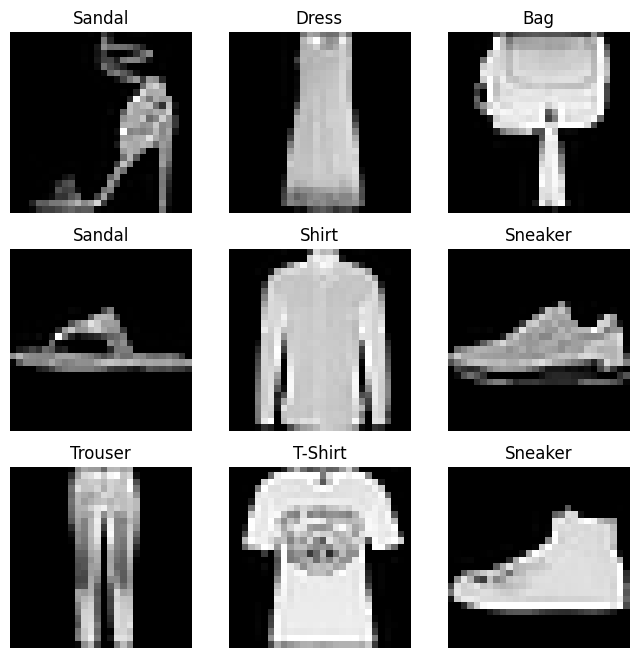

In [37]:
# Iterating and Visualizing the Dataset
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [38]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [39]:
# Preparing data for training with DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Features batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


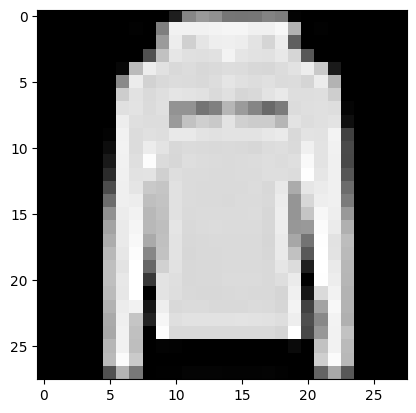

Label: 2
Label_Name: Pullover


In [40]:
# Iterate through the DataLoader

train_features, train_labels = next(iter(train_dataloader))
print(f"Features batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
print(f"Label_Name: {labels_map[label.item()]}")

#### Creating a Custom Dataset for your files

In [41]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img.labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

#### Transforms

In [42]:
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor(),
        target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0,
                                    torch.tensor(y), value=1))
)

#### Build the Neural Network

In [43]:
from torch import nn
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [44]:
# Define the class

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [45]:
# We create an instance of NeuralNetwork, and move it to the device, and print its structure.

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


###### Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the nn.Softmax module.

In [46]:
X = torch.rand(2, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")
print(pred_probab[0].sum())

Predicted class: tensor([6, 2])
tensor(1.0000, grad_fn=<SumBackward0>)


#### Model Parameters 
Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() or named_parameters() methods. In this example, we iterate over each parameter, and print its size and a preview of its values.

In [47]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0354,  0.0072, -0.0338,  ...,  0.0011,  0.0208, -0.0249],
        [-0.0088, -0.0109,  0.0211,  ..., -0.0190,  0.0159,  0.0289]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0297,  0.0189], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0075,  0.0335, -0.0151,  ..., -0.0315,  0.0388,  0.0207],
        [-0.0137,  0.0266, -0.0234,  ...,  0.0187,  0.0389, -0.0322]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

#### Autograd

In [48]:
# Build a simple one-layer neural network
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x,w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [49]:
# Computing Gradients

loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2838, 0.0030, 0.1972],
        [0.2838, 0.0030, 0.1972],
        [0.2838, 0.0030, 0.1972],
        [0.2838, 0.0030, 0.1972],
        [0.2838, 0.0030, 0.1972]])
tensor([0.2838, 0.0030, 0.1972])


In [50]:
# Disabling Gradient Tracking
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)
print("\n")
# Alteranative method
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

True
False


False


#### Optimizing Model Parameters

In [51]:
# Hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [52]:
# run cell to have an idea of what the enumaration is doing with the dataloader
# You can skip if already familiar with it.
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch {batch + 1}")
    print(f"Input batch shape: {X.shape}")
    print(f"Labels batch shape: {y.shape}")

Batch 1
Input batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Batch 2
Input batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Batch 3
Input batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Batch 4
Input batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Batch 5
Input batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Batch 6
Input batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Batch 7
Input batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Batch 8
Input batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Batch 9
Input batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Batch 10
Input batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Batch 11
Input batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: tor

In [53]:
# ---------------------
# Full Implementation
# ---------------------

# Define train_loop that loops over our optimization code
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

# Define test_loop that evaluates the model’s performance against our test data
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to train_loop and test_loop. Feel free to increase the number of epochs to track the model’s improving performance.

In [54]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-----------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done with training!")

Epoch 1
-----------------------------------
loss: 2.313574 [   64/60000]
loss: 2.296962 [ 6464/60000]
loss: 2.277224 [12864/60000]
loss: 2.256267 [19264/60000]
loss: 2.243450 [25664/60000]
loss: 2.242437 [32064/60000]
loss: 2.208964 [38464/60000]
loss: 2.211257 [44864/60000]
loss: 2.213290 [51264/60000]
loss: 2.199478 [57664/60000]
Test Error: 
 Accuracy: 38.1%, Avg loss: 2.159424 

Epoch 2
-----------------------------------
loss: 2.143414 [   64/60000]
loss: 2.145669 [ 6464/60000]
loss: 2.104337 [12864/60000]
loss: 2.100598 [19264/60000]
loss: 2.038629 [25664/60000]
loss: 2.083845 [32064/60000]
loss: 2.006504 [38464/60000]
loss: 1.995022 [44864/60000]
loss: 1.961838 [51264/60000]
loss: 1.895886 [57664/60000]
Test Error: 
 Accuracy: 56.0%, Avg loss: 1.880343 

Epoch 3
-----------------------------------
loss: 1.896470 [   64/60000]
loss: 1.876490 [ 6464/60000]
loss: 1.739582 [12864/60000]
loss: 1.788803 [19264/60000]
loss: 1.726874 [25664/60000]
loss: 1.682045 [32064/60000]
loss: 1.64